In [274]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
from itertools import combinations

### Задача 1
 
Дана матрица объект-признак
X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]
и значения целевой переменной
y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]



In [275]:
X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

In [276]:
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

In [277]:
Xt = X.transpose()

In [278]:
df = pd.DataFrame({'x1':[ 1.22401313, -0.18757272, -0.81094525,  0.75129018,  0.00972362,
        -0.62972637,  2.29536229,  0.0920418 ,  2.39252799,  0.54983815], 'x2':[ 2.30868478,  1.30337355,  1.82463398,  2.67392052,  1.97367255,
         0.77750764,  1.81206697,  2.26971361,  3.17563985,  2.87988651], 'x3':[ 3.03636353,  5.12093014,  5.79686488,  3.65529809,  2.50594319,
         2.84124027,  1.95026215,  7.47708735,  3.61420599,  1.65752765], 'x4':[ 2.69287214,  3.46363202,  1.86159445,  1.66746094,  1.69755173,
         4.54410559,  1.51874636,  2.61081203,  5.10773362,  1.59635987]}, columns = ['x1','x2', 'x3', 'x4'])

In [279]:
list(combinations(df, r=2))

[('x1', 'x2'),
 ('x1', 'x3'),
 ('x1', 'x4'),
 ('x2', 'x3'),
 ('x2', 'x4'),
 ('x3', 'x4')]

In [280]:
X12 = df[['x1', 'x2']].values
X13 = df[['x1', 'x3']].values
X14 = df[['x1', 'x4']].values
X23 = df[['x2', 'x3']].values
X24 = df[['x2', 'x4']].values
X34 = df[['x3', 'x4']].values

In [281]:
pairs = [X12, X13, X14, X23, X24, X34]
rezults = []

In [282]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [283]:
def deter(Xkm):
    ones = np.ones((Xkm.shape[0], 1))
    Xkm = np.hstack((ones, Xkm))
    XTX = Xkm.T.dot(Xkm)
    np.linalg.det(XTX)
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(Xkm.T).dot(y)
    zkm = Xkm.dot(b)
    ekm = y - zkm
    R2_km = 1 - sum_of_squares(ekm) / sum_of_squares(y)
    return R2_km

In [284]:
n = 0

while True:
    if n < 6:
        for i in pairs:
            R2 = deter(i)
            rezults.append(R2)
            i += 1
            n += 1
    else:
        break
print(rezults) 

[0.18113594742585204, 0.7634246238793152, 0.45329667831440745, 0.5479482734039012, 0.6062055761129932, 0.6224419876505322]


In [285]:
max(rezults)

0.7634246238793152

In [286]:
R2_13 = deter(X13)
R2_13

0.7634246238793151

Итак, два признака c максимальным уровенeм линейной зависимости целевой переменной от значений Х1 и Х3

Проверим значимость уравнения регрессии:

In [287]:
n = X13.shape[0]
m = X13.shape[1] - 1  # так как добавляли фиктивный столбец

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [288]:
alpha = 0.03

t = stats.f.ppf(1 - alpha, k1, k2)
t

6.936978179542433

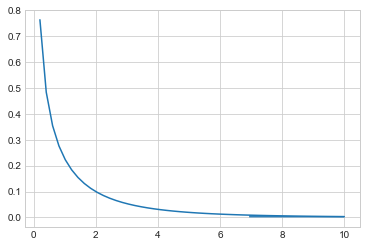

In [289]:
ox = np.linspace(0, 10, 50)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 10, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.9)

In [290]:
F = (R2_13 / k1) / ((1 - R2_13) / k2)
F

25.81586085239461

Уравнение регрессии признаётся значимым X1 и X3

### Задача 2
 
Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [291]:
#salary 
x1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
#scoring 
y1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Найдём коэффициенты линейной регрессии с помощью формул для парной регрессии:

In [292]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)

b0, b1

(444.1773573243596, 2.620538882402765)

модель линейной регрессии имеет вид:
$$y = 444.17 + 2.62 \cdot x,$$

Найдём коэффициенты линейной регрессии с помощью метода наименьших квадратов:

In [293]:
df = pd.DataFrame({'salary': [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 'scoring':[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]})

In [294]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

In [295]:
x2 = df[['salary']].values
y2 = df[['scoring']].values

К матрице $X$ (массив `x2`) нужно также добавить столбец из $1$, соответствующий фиктивному фактору.

In [296]:
x2.shape

(10, 1)

In [297]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [298]:
x2.shape

(10, 2)

In [299]:
x2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [300]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

349464.00000000023

Определитель не близок к нулю, поэтому проблем с методом нет. Коэффициенты модели:

In [301]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[444.17735732]
 [  2.62053888]]


Итак, наша модель регрессии имеет вид:
$$y = 444.177 + 2.6205 \cdot x_1,$$
где $x_1$ — scoring



Построим scatter plot по данным и отметим на нём прямую линейной регрессии, полученную в п. 1:

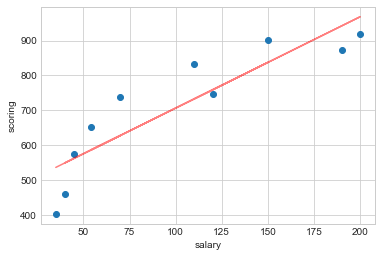

In [302]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');


Посчитаем коэффициент детерминации для модели $$R^2 = 1 - \dfrac{SS_{res}}{SS_{y}}$$

In [303]:
z1 = b0 + b1 * x1
e1 = y1 - z1 

In [304]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [305]:
R1 = 1 - sum_of_squares(e1) / sum_of_squares(y1)
R1

0.7876386635293686

Коэффициент детерминации, равный $0.7876$, означает, что $78 \%$ дисперсии переменной $y$ _учитывается_ или _объясняется_ моделью. Оставшиеся $22 \%$ обусловлены какими-то ещё факторами, которые при построении модели не учитывались.

Посчитаем среднюю ошибку аппроксимации
Она вычисляется по формуле:

$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

Если $\overline{A}$ не превышает $8-10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

In [306]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [307]:
mean_approximation_error(y1, z1)

0.11469251843561709

Оценим построенное уравнение регрессии с помощью F-критерия Фишера:

Формально при таком тесте проверяется нулевая гипотеза о том, что теоретический коэффициент детерминации (т.е. для модели, построенной для случайных величин) равен $0$, т.е. что в имеющихся данных вообще нет никакой зависимости. 
При F-тесте используется статистика:
$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. Такая статистика в предположении верности нулевой гипотезы имеет __F-распределение Фишера__ с параметрами $k_1 = m$, $k_2 = n - m - 1$.
Распределение Фишера имеет один хвост, поэтому рассматривается правосторонняя критическая область $\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right)$, где $t_{\beta, \: k_1, k_2}$ — квантиль порядка $\beta$ для распределения Фишера с параметрами $k_1$, $k_2$.
Если статистика попадает в критическую область, то гипотеза о равенстве нулю коэффициента детерминации отвергается. Это означает, что построенная нами модель значимо соответствует данным.

In [308]:
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

Возьмём уровень значимости $\alpha = 0.05$. Нужный нам квантиль можно посчитать с помощью функции `scipy.stats.f.ppf`:

In [309]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

Итак, критическая область:
$$\Omega_\alpha = \left( 5.3176, \infty \right)$$

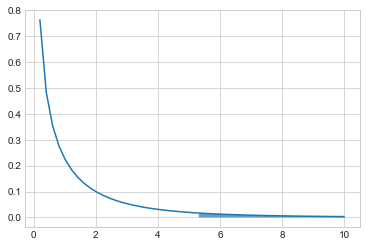

In [310]:
ox = np.linspace(0, 10, 50)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 10, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.7)

# plt.ylim(0, 0.5)

Считаем значение статистики:

In [311]:
F = (R1 / k1) / ((1 - R1) / k2)
F

29.67164085966451

Статистика попала в критическую область, уравнение регрессии признаётся значимым.


Построим для получившихся параметров доверительные интервалы с помощью t-статистики Стьюдента:

In [312]:
b1, b0

(2.620538882402765, 444.1773573243596)

In [313]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [314]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.48108279568516005

Зададим уровень доверия $p = 0.95$, т.е. $\alpha = 0.05$. Найдём нужный нам квантиль.

In [315]:
alpha = 0.05
n = x1.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2

(-2.306004135033371, 2.3060041350333704)

Доверительный интервал для параметра $b_1$:

In [316]:
(b1 + t1 * s_slope, b1 + t2 * s_slope)

(1.5111599662593715, 3.729917798546158)

Аналогично для параметра $b_0$:

In [317]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [318]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

56.46649755068153

Квантиль нам подойдёт тот же самый. Итак, доверительный интервал для параметра $b_0$:

In [319]:
(b0 + t1 * s_intercept, b0 + t2 * s_intercept)

(313.9653804816363, 574.3893341670829)